In [22]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#bring in the six packs
df_train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')

In [3]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


가장 먼저, 주어진 데이터를 카테고리형 데이터(Category data로 명명)와<br> 
수치상으로 나타내어진 데이터(Numeric data로 명명)으로 나눈다.<br>
이때, 수치상으로 나타내어진 데이터라도 discrete한 데이터에 대해서는 카테고리형 데이터로 분류한다.<br>
분류된 데이터와 각 데이터에 대한 설명은 다음과 같다.<br>

Category data
----------------------------------------------------------------
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	


Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
	


RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone


ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement


BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement


Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor


Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

KitchenAbvGr: Kitchens above grade

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
		
Fireplaces: Number of fireplaces

GarageCars: Size of garage in car capacity

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

Numeric data
---------------------------------------------------------------
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

MasVnrArea: Masonry veneer area in square feet

BsmtFinSF1: Type 1 finished square feet

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

GarageYrBlt: Year garage was built

GarageArea: Size of garage in square feet
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet
		
MiscVal: $Value of miscellaneous feature

In [4]:
category_data_list = [
    "MSSubClass",
    "MSZoning",
    "Street",
    "Alley",
    "LotShape",
    "LandContour",
    "Utilities",
    "LotConfig",
    "LandSlope",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "OverallQual",
    "OverallCond",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "MasVnrType",
    "ExterQual",
    "ExterCond",
    "Foundation",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "Heating",
    "HeatingQC",
    "CentralAir",
    "Electrical",
    "KitchenQual",
    "Functional",
    "FireplaceQu",
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "PavedDrive",
    "PoolQC",
    "Fence",
    "MiscFeature",
    "SaleType",
    "SaleCondition",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageCars",
    "MoSold",
    "YrSold"
]
numeric_data_list = [
    "LotFrontage",
    "LotArea",
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "GarageYrBlt",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal"
]

각 데이터의 결측치의 갯수를 계산해서 결측치가 많은 데이터들을 제거해주는 작업을 실시하는데, 그 전에 NA라는 데이터가 의미(수집하지 못한 데이터가 아닌 "없다." 라는 의미의 데이터.) 있는 데이터들에 대해서 NA를 채워줌

아래의 데이터는 NA데이터가 의미를 가지는 데이터들이다.

Alley: Type of alley access to property

       Grvl    Gravel
       Pave    Paved
       NA     No alley access
   
BsmtQual: Evaluates the height of the basement

       Ex    Excellent (100+ inches)    
       Gd    Good (90-99 inches)
       TA    Typical (80-89 inches)
       Fa    Fair (70-79 inches)
       Po    Poor (<70 inches
       NA    No Basement
   
BsmtCond: Evaluates the general condition of the basement

       Ex    Excellent
       Gd    Good
       TA    Typical - slight dampness allowed
       Fa    Fair - dampness or some cracking or settling
       Po    Poor - Severe cracking, settling, or wetness
       NA    No Basement
   
BsmtExposure: Refers to walkout or garden level walls

       Gd    Good Exposure
       Av    Average Exposure (split levels or foyers typically score average or above)    
       Mn    Mimimum Exposure
       No    No Exposure
       NA    No Basement
   
BsmtFinType1: Rating of basement finished area

       GLQ    Good Living Quarters
       ALQ    Average Living Quarters
       BLQ    Below Average Living Quarters    
       Rec    Average Rec Room
       LwQ    Low Quality
       Unf    Unfinshed
       NA    No Basement
   
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ    Good Living Quarters
       ALQ    Average Living Quarters
       BLQ    Below Average Living Quarters    
       Rec    Average Rec Room
       LwQ    Low Quality
       Unf    Unfinshed
       NA    No Basement
   
FireplaceQu: Fireplace quality

       Ex    Excellent - Exceptional Masonry Fireplace
       Gd    Good - Masonry Fireplace in main level
       TA    Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa    Fair - Prefabricated Fireplace in basement
       Po    Poor - Ben Franklin Stove
       NA    No Fireplace
   
GarageType: Garage location

       2Types    More than one type of garage
       Attchd    Attached to home
       Basment    Basement Garage
       BuiltIn    Built-In (Garage part of house - typically has room above garage)
       CarPort    Car Port
       Detchd    Detached from home
       NA    No Garage
   
GarageFinish: Interior finish of the garage

       Fin    Finished
       RFn    Rough Finished    
       Unf    Unfinished
       NA    No Garage
   
GarageQual: Garage quality

       Ex    Excellent
       Gd    Good
       TA    Typical/Average
       Fa    Fair
       Po    Poor
       NA    No Garage
       
GarageCond: Garage condition

       Ex    Excellent
       Gd    Good
       TA    Typical/Average
       Fa    Fair
       Po    Poor
       NA    No Garage
   
PoolQC: Pool quality

       Ex    Excellent
       Gd    Good
       TA    Average/Typical
       Fa    Fair
       NA    No Pool
   
Fence: Fence quality

       GdPrv    Good Privacy
       MnPrv    Minimum Privacy
       GdWo    Good Wood
       MnWw    Minimum Wood/Wire
       NA    No Fence
   
MiscFeature: Miscellaneous feature not covered in other categories

       Elev    Elevator
       Gar2    2nd Garage (if not described in garage section)
       Othr    Other
       Shed    Shed (over 100 SF)
       TenC    Tennis Court
       NA    None

In [5]:
NA_is_non_missing = [ # NA가 결측치를 의미하지 않는 데이터
    "Alley",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "FireplaceQu",
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "Fence",
    "MiscFeature"    
]
for var in NA_is_non_missing:
    df_train[var].fillna("NA", inplace=True)

In [6]:
# missing data count of category data column
df_train[category_data_list].isnull().sum()

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd

In [7]:
# missing data count of numeric data
df_train[numeric_data_list].isnull().sum()

LotFrontage      259
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageYrBlt       81
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
dtype: int64

NA값이 의미를 가지는 데이터에 대해서 값을 채워준 후에,<br>
누락된 데이터의 개수를 확인한 결과 누락된 데이터의 개수가 50% 이상인 데이터는 존재하지 않았고,<br>
이에 따라, 위 과정에서는 아무런 데이터도 버려지지 않았다.<br>

그리고 category data column에서 각 category의 data 개수를 확인해서<br>
category별로 비교할만한 data column을 추려냄, 여기서 비교할 만한 데이터란,<br>
한 category에 대해서만 data가 존재하는 data column를 의미한다.

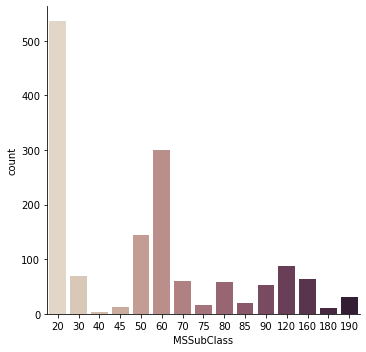

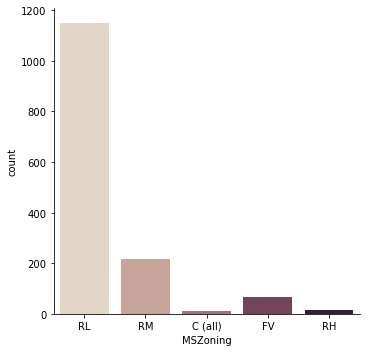

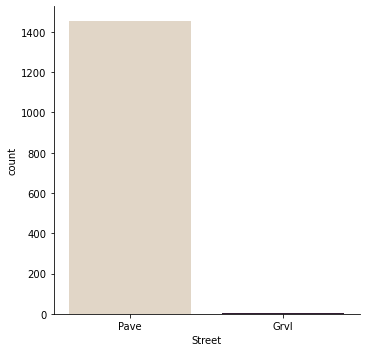

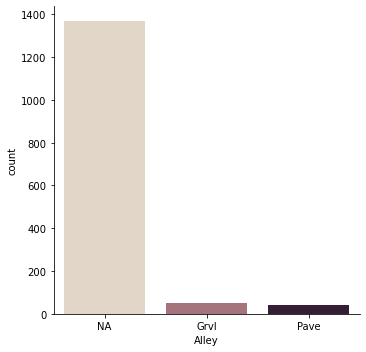

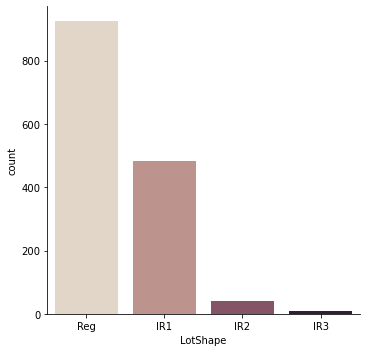

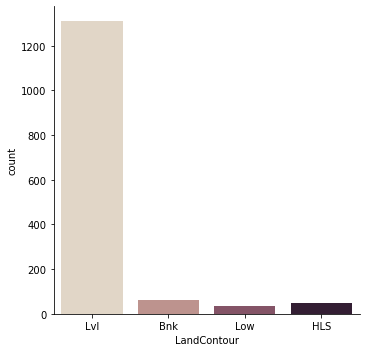

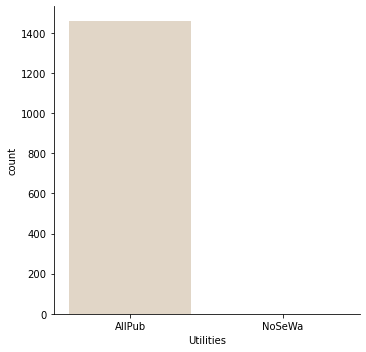

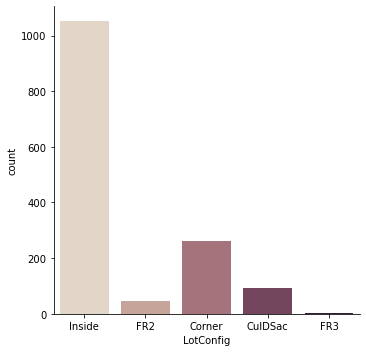

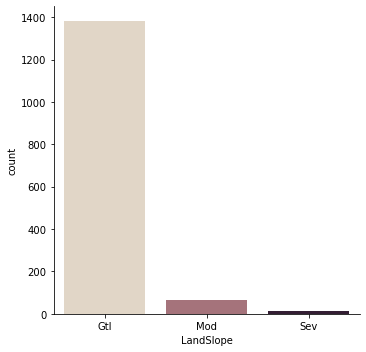

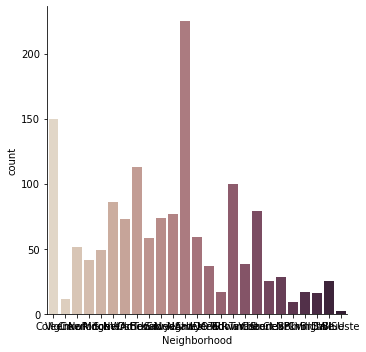

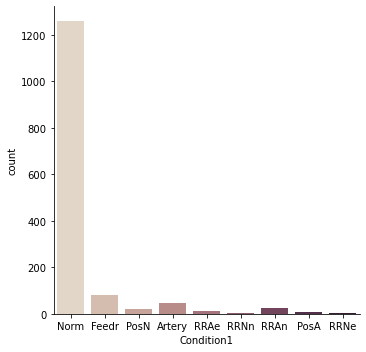

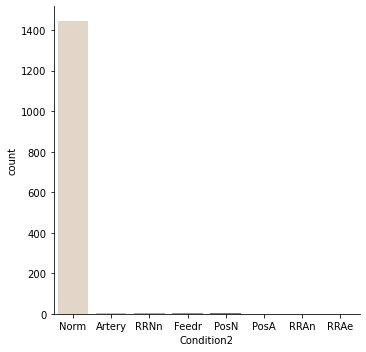

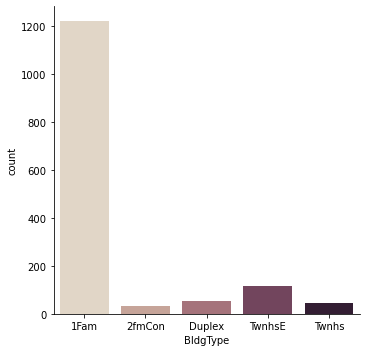

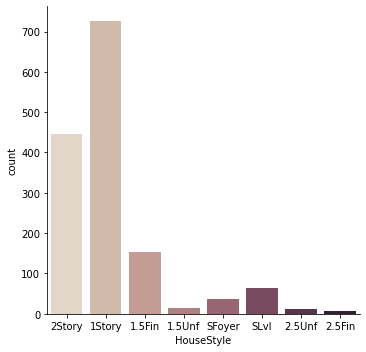

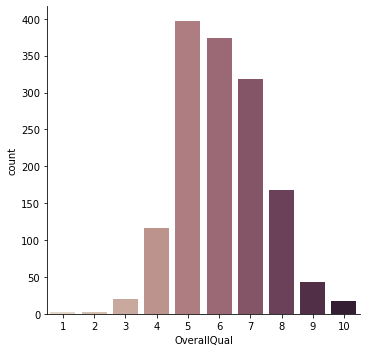

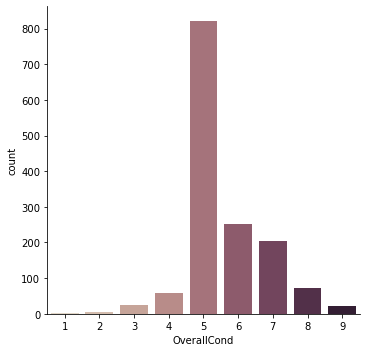

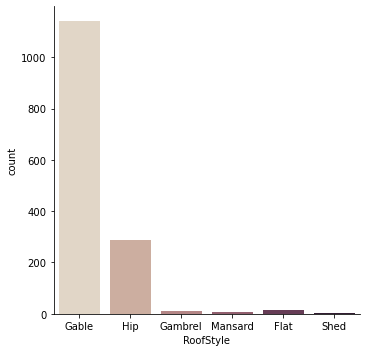

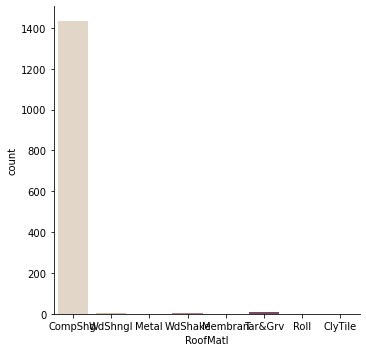

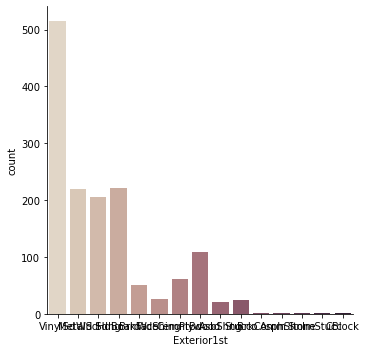

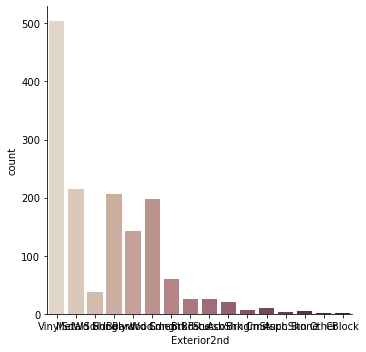

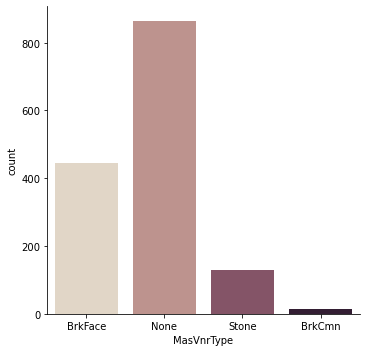

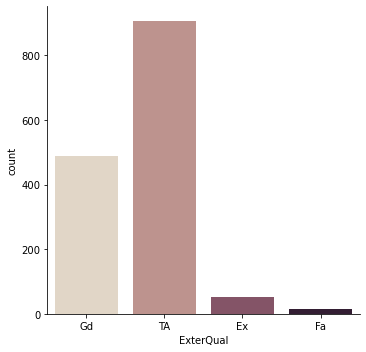

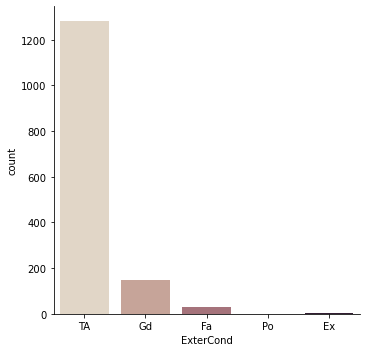

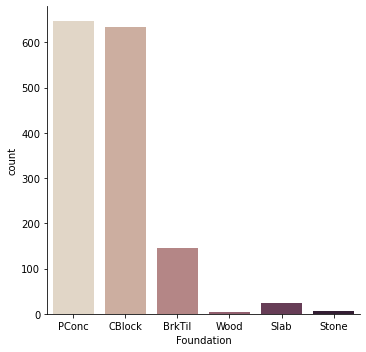

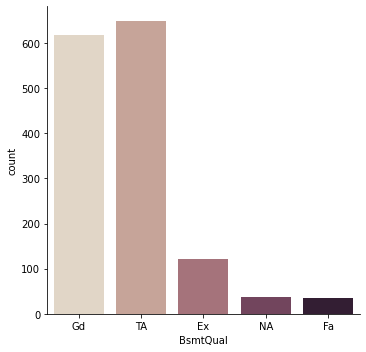

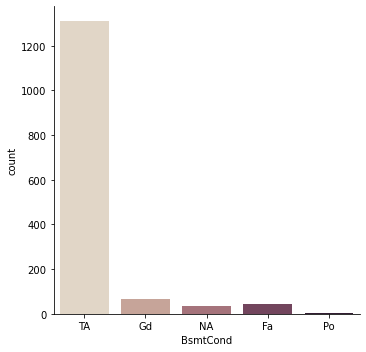

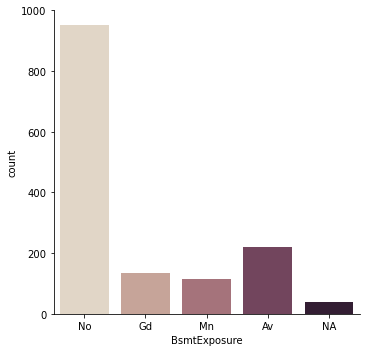

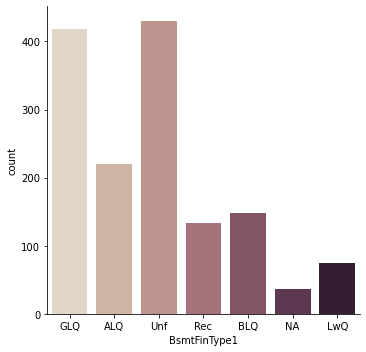

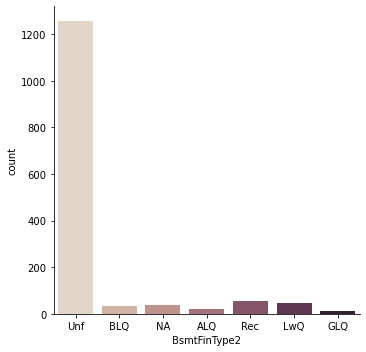

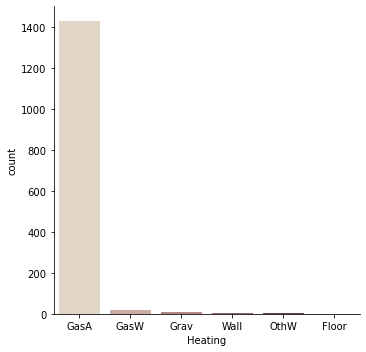

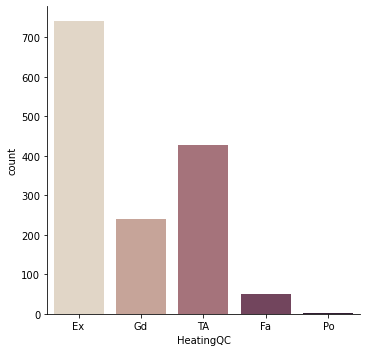

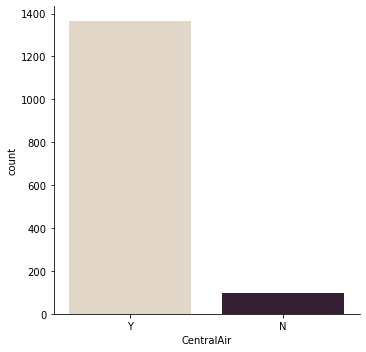

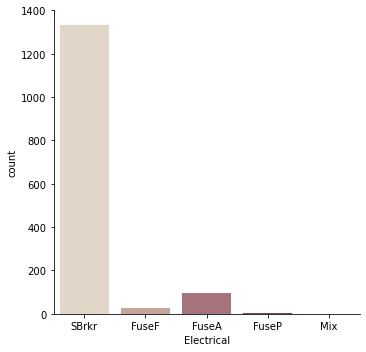

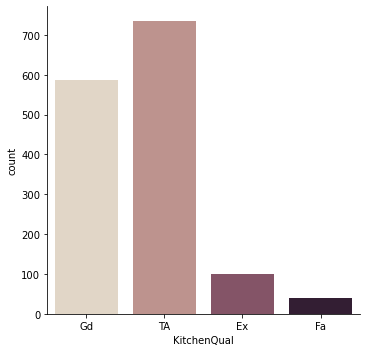

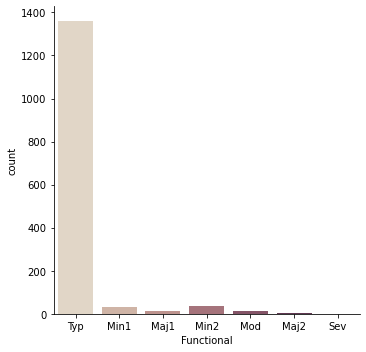

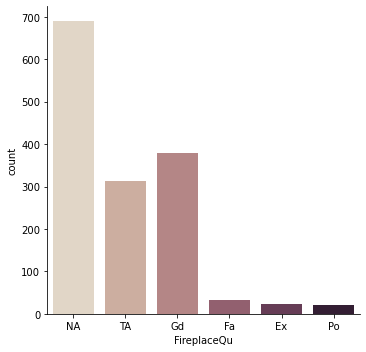

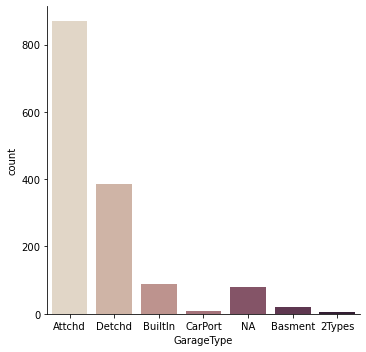

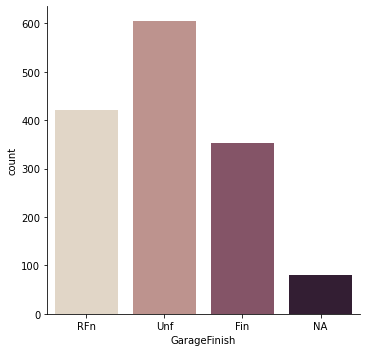

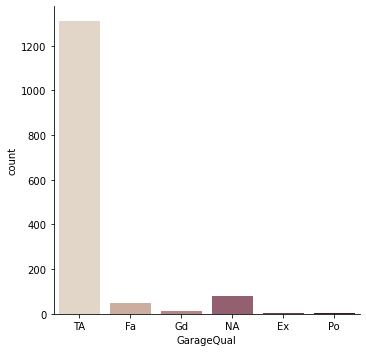

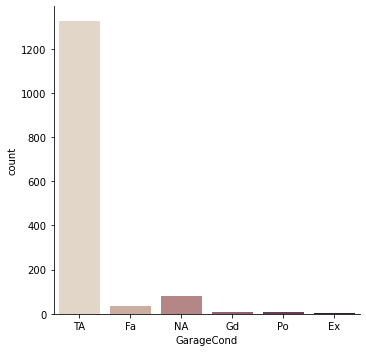

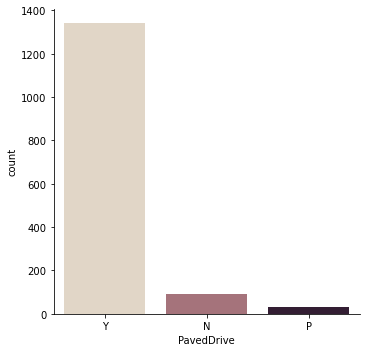

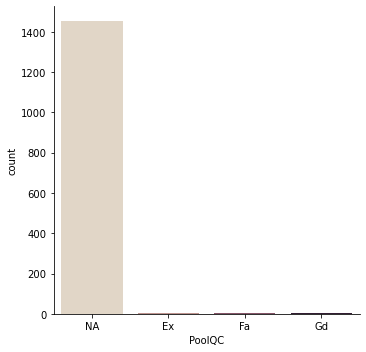

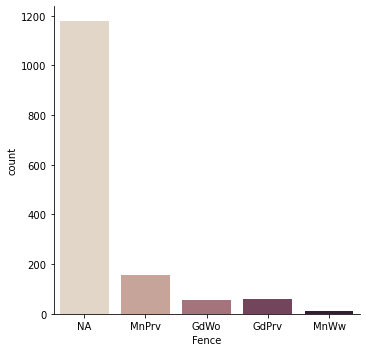

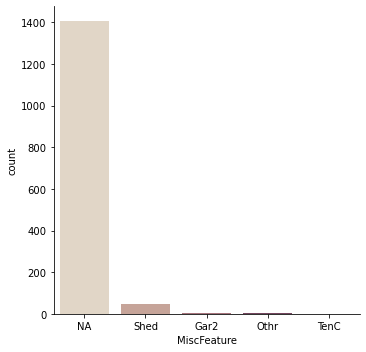

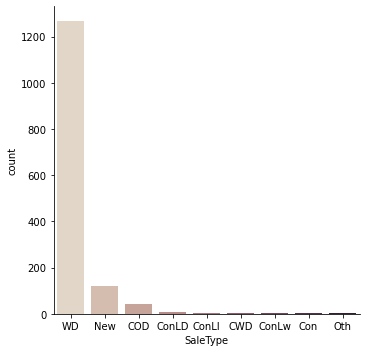

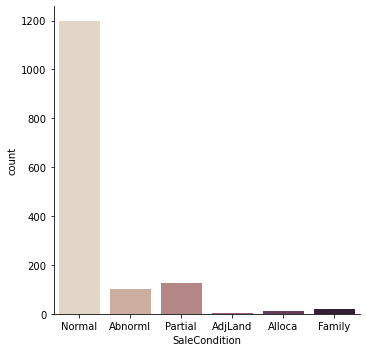

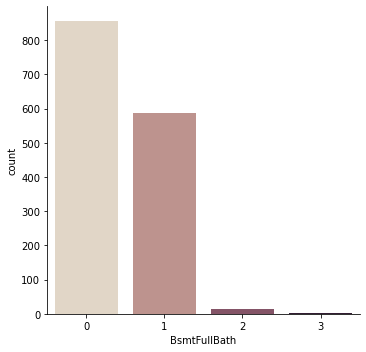

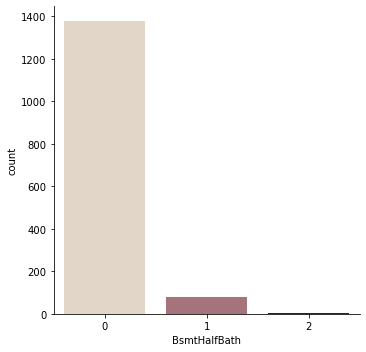

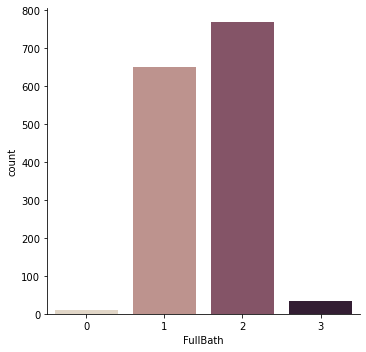

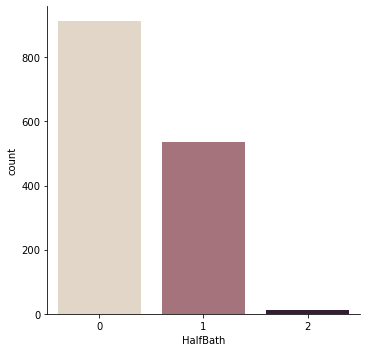

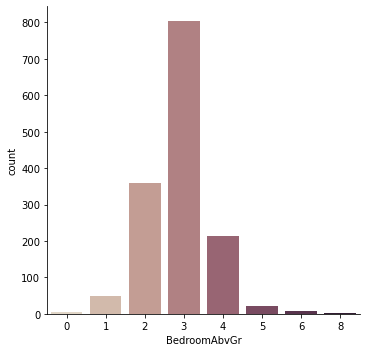

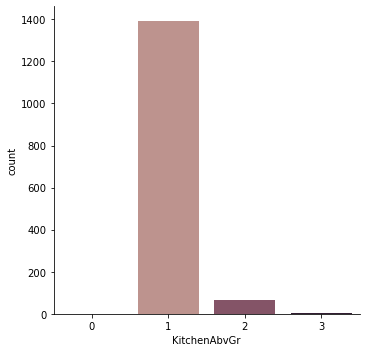

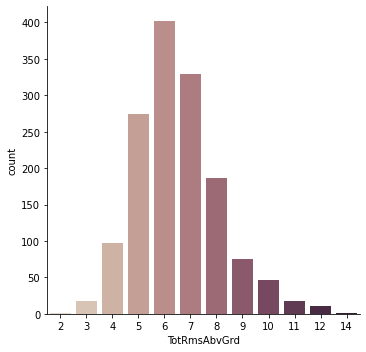

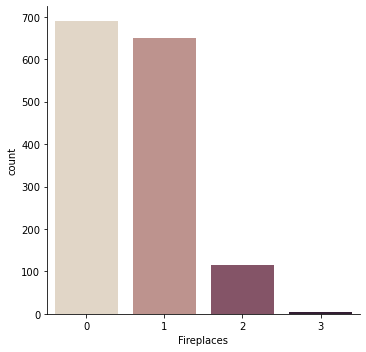

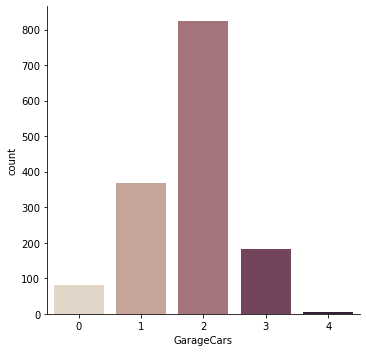

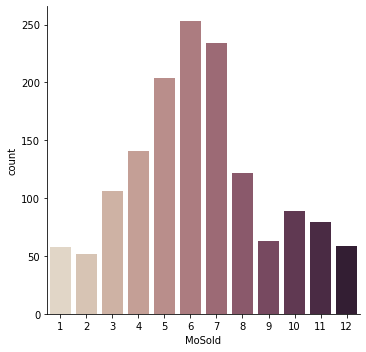

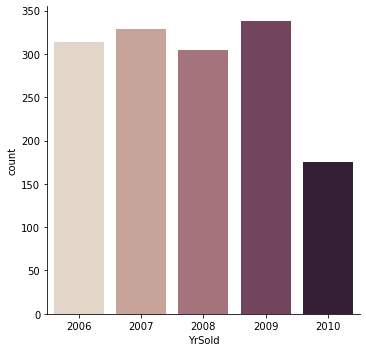

In [8]:
for column in df_train[category_data_list]:
    if(column == "Id" or column == "SalePrice"):
        continue
    sns_plot = sns.catplot(x=column, kind="count", palette="ch:.25", data=df_train)
    sns_plot.savefig(column)

주된 카테고리를 제외한 카테고리의 데이터 수가 100개 이상인 데이터들을 제외한 다른 데이터들은 추려내어 버려졌고,

추려낸 데이터들과, 각 데이터의 카테고리별 데이터 갯수는 다음과 같다.

MSSubClass
<img src="MSSubClass.png"/>

PavedDrive
<img src="PavedDrive.png"/>

Electrical
<img src="Electrical.png"/>

HeatingQC
<img src="HeatingQC.png"/>

BsmtFinType1
<img src="BsmtFinType1.png"/>

BsmtExposure
<img src="BsmtExposure.png"/>

BsmtQual
<img src="BsmtQual.png"/>

KitchenQual
<img src="KitchenQual.png"/>

ExterCond
<img src="ExterCond.png"/>

Fence
<img src="Fence.png"/>

GarageFinish
<img src="GarageFinish.png"/>

FireplaceQu
<img src="FireplaceQu.png"/>

ExterQual
<img src="ExterQual.png"/>

RoofStyle
<img src="RoofStyle.png"/>

Exterior1st
<img src="Exterior1st.png"/>

Exterior2nd
<img src="Exterior2nd.png"/>

OverallQual
<img src="OverallQual.png"/>

OverallCond
<img src="OverallCond.png"/>

LotShape
<img src="LotShape.png"/>

BldgType
<img src="BldgType.png"/>

HouseStyle
<img src="HouseStyle.png"/>

MasVnrType
<img src="MasVnrType.png"/>

GarageType
<img src="GarageType.png"/>

LotConfig
<img src="LotConfig.png"/>

Foundation
<img src="Foundation.png"/>

Neighborhood
<img src="Neighborhood.png"/>

MSZoning
<img src="MSZoning.png"/>

SaleCondition
<img src="SaleCondition.png"/>

BsmtFullBath
<img src="BsmtFullBath.png"/>

FullBath
<img src="FullBath.png"/>

HalfBath
<img src="HalfBath.png"/>

BedroomAbvGr
<img src="BedroomAbvGr.png"/>

TotRmsAbvGrd
<img src="TotRmsAbvGrd.png"/>

Fireplaces
<img src="Fireplaces.png"/>

GarageCars
<img src="GarageCars.png"/>

MoSold
<img src="MoSold.png"/>

YrSold
<img src="YrSold.png"/>


그리고, 추려낸 데이터들을 <br>
각 카테고리를 보고, 카테고리별 집값의 평균치의 크기 순서가 쉽게 유추 가능한 데이터들(주로 평가와 관련된 데이터가 많음)과,<br>
카테고리별 집값의 평균치의 차이가 있음을 예측할 수 있으나, 크기 순서를 유추하기 어려운 데이터들과,<br>
카테고리가 직접적으로 집값에 영향을 미치지 않는 데이터로 나누었다.<br>
이렇게 나누어진 데이터들의 목록과 데이터에 대한 설명은 다음과 같다.<br>
<br>
<br>
크기 순서를 유추 가능한 데이터(comparable value로 명명)<br>
-----------------------------------<br>
OverallQual: Rates the overall material and finish of the house<br>
OverallCond: Rates the overall condition of the house<br>
HeatingQC: Heating quality and condition<br>
BsmtQual: Evaluates the height of the basement<br>
BsmtFinType1: Rating of basement finished area<br>
BsmtExposure: Refers to walkout or garden level walls<br>
KitchenQual: Kitchen quality<br>
ExterQual: Evaluates the quality of the material on the exterior <br>
ExterCond: Evaluates the present condition of the material on the exterior<br>
GarageFinish: Interior finish of the garage<br>
FireplaceQu: Fireplace quality<br>
Fence: Fence quality<br>
PavedDrive: Paved driveway<br>
Electrical: Electrical system<br>
BsmtFullBath: Basement full bathrooms<br>
FullBath: Full bathrooms above grade<br>
HalfBath: Half baths above grade<br>
BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)<br>
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)<br>
Fireplaces: Number of fireplaces<br>
GarageCars: Size of garage in car capacity<br>
<br>
크기 순서를 유추하기 어려운 데이터(uncomparable value로 명명)<br>
------------------------------------------------<br>
MSSubClass: Identifies the type of dwelling involved in the sale.<br>
RoofStyle: Type of roof<br>
Exterior1st: Exterior covering on house<br>
Exterior2nd: Exterior covering on house (if more than one material)<br>
LotShape: General shape of property<br>
BldgType: Type of dwelling<br>
HouseStyle: Style of dwelling<br>
MasVnrType: Masonry veneer type<br>
GarageType: Garage location<br>
LotConfig: Lot configuration<br>
Foundation: Type of foundation<br>
<br>
<br>
카테고리가 직접적으로 집값에 영향을 미치지 않는 데이터(others로 명명)<br>
------------------------------------------------<br>
Neighborhood: Physical locations within Ames city limits<br>
MSZoning: Identifies the general zoning classification of the sale.<br>
SaleCondition: Condition of sale<br>
MoSold: Month Sold (MM)<br>
YrSold: Year Sold (YYYY)<br>
<br>

우선 카테고리별 집값의 평균치의 크기 순서가 쉽게 유추 가능한 데이터들의 SalePrice의 평균값의 분포를 boxplot을 이용해 확인한다.<br>

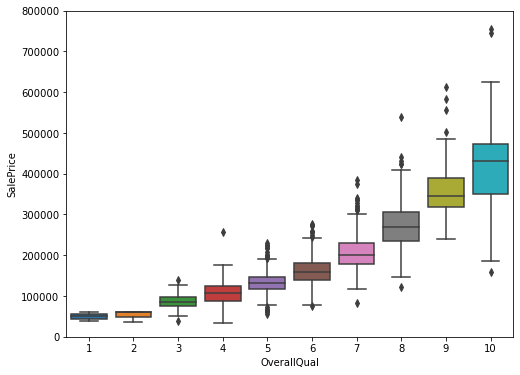

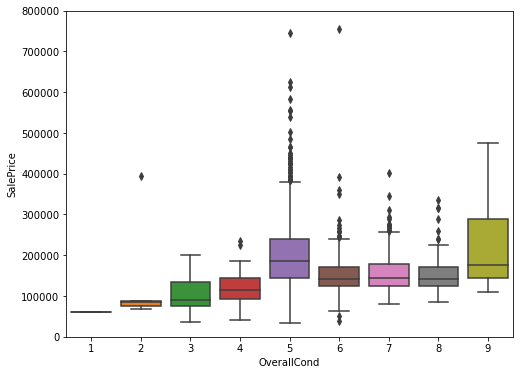

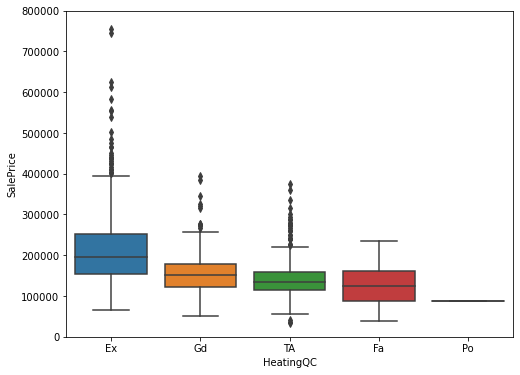

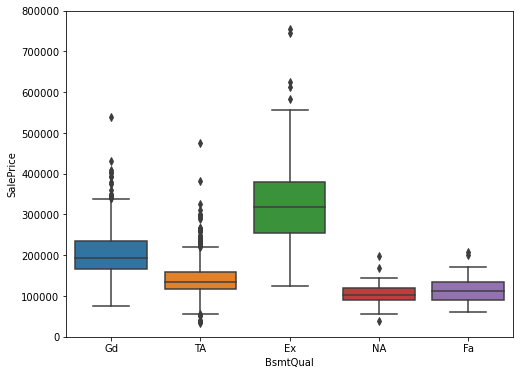

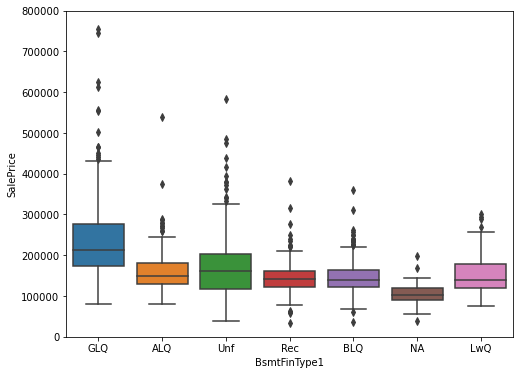

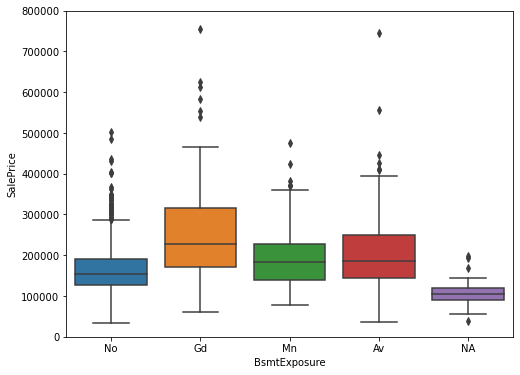

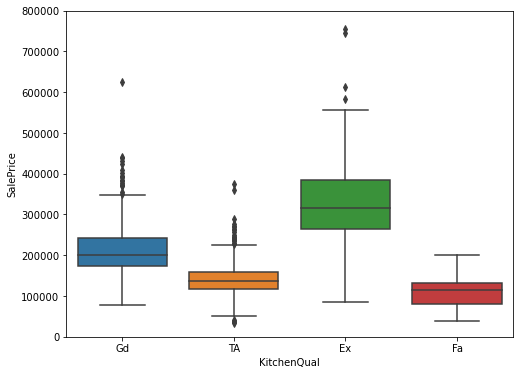

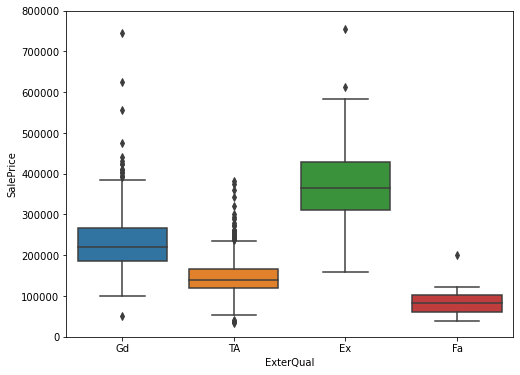

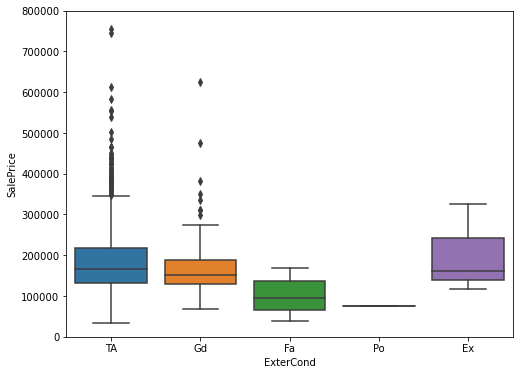

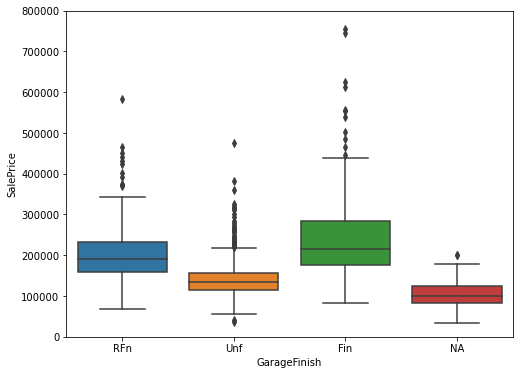

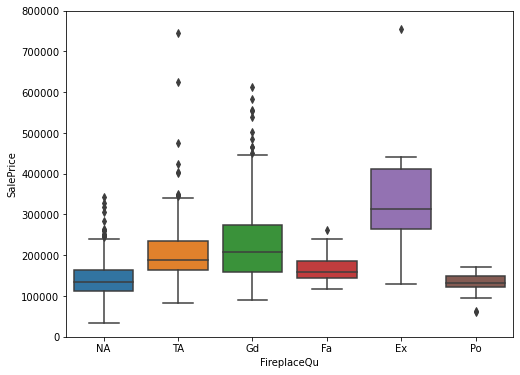

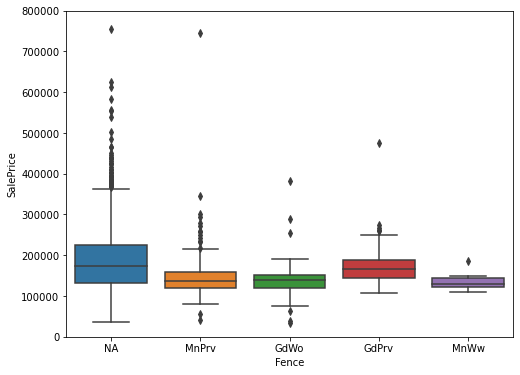

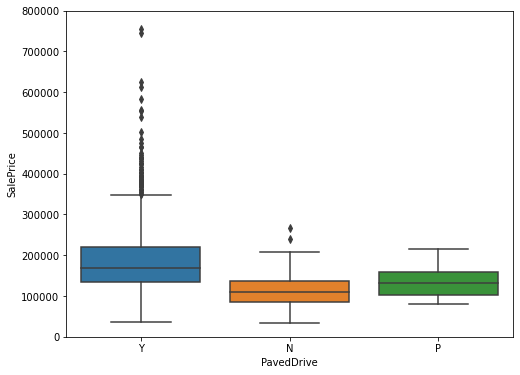

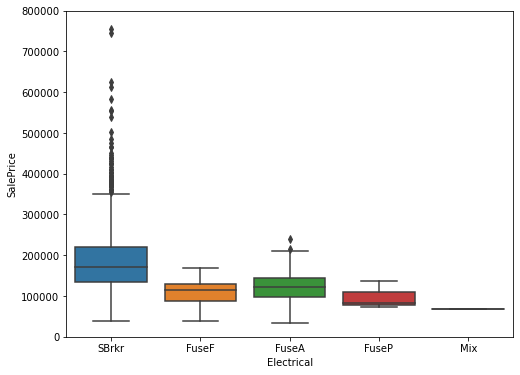

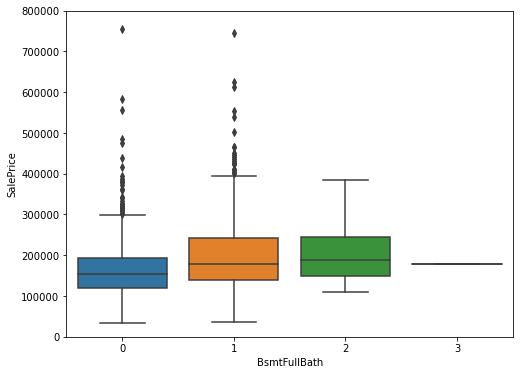

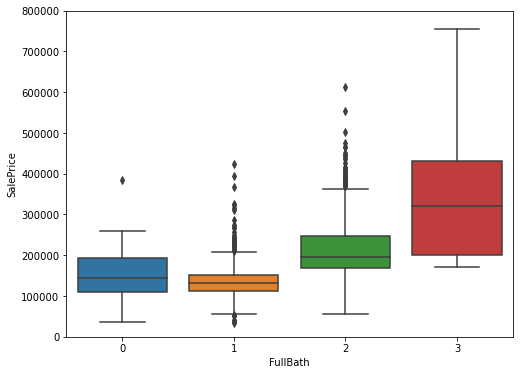

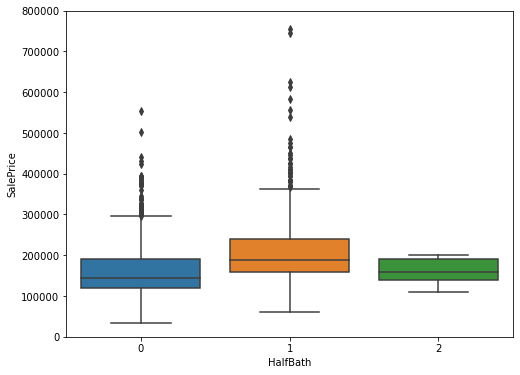

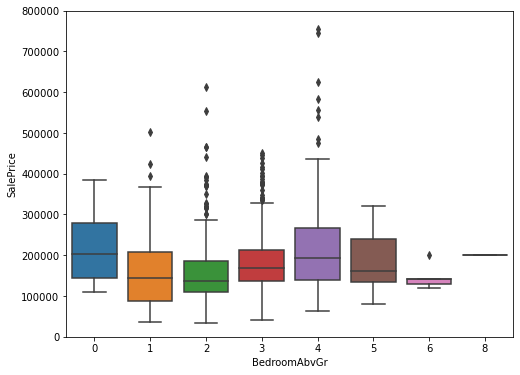

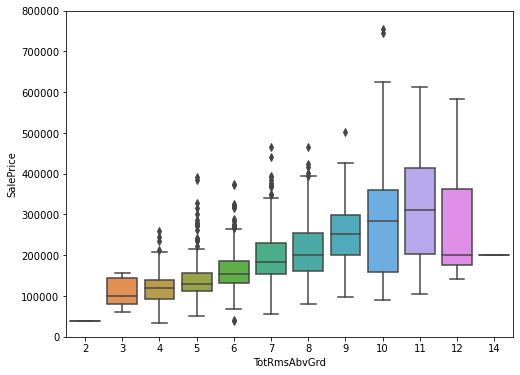

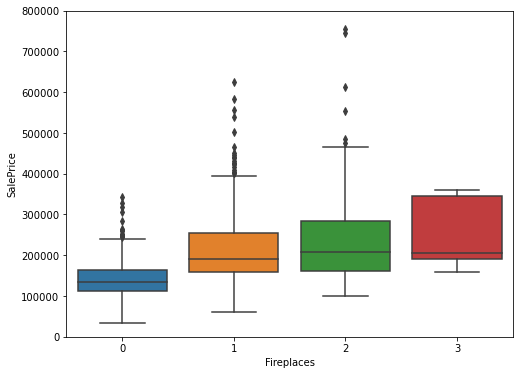

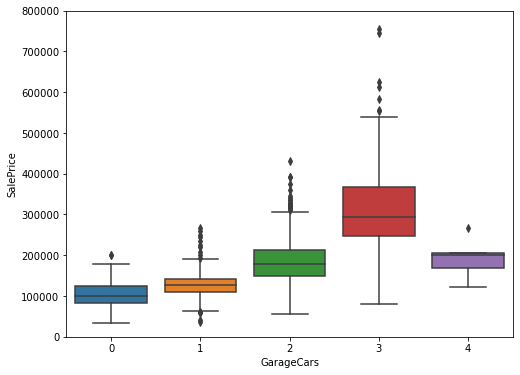

In [9]:
comparable_value_list = [
    "OverallQual",
    "OverallCond",
    "HeatingQC",
    "BsmtQual",
    "BsmtFinType1",
    "BsmtExposure",
    "KitchenQual",
    "ExterQual",
    "ExterCond",
    "GarageFinish",
    "FireplaceQu",
    "Fence",
    "PavedDrive",
    "Electrical",   
    "BsmtFullBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageCars"
]

for var in comparable_value_list:
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)

분석 결과, Excellent, Good, Average/Typical, Fair, Poor 등 평가로 이루어진 데이터들의 경우 평가가 낮은것부터 높은것까지 집값의 평균 데이터가 점점 올라가는것을 확인했고, 평가로 이루어진 데이터들이 아닌 경우에는

BedroomAbvGr(지상에 위치한 침실의 수)와 GarageCars(차고의 차량 수용량)을 제외한
모든 데이터들이 일반적인 집을 평가하는 기준을 놓고 그래프를 보았을 때, 그래프가 일반적인 집을 평가하는 기준과 부합함을 확인했다.

GarageCars의 경우에는 4대 이상의 차량을 수용하는 차고를 가진 집에 데이터가 적어 예상과 벗어난 그래프를 나타낸 것으로 보인다.

그리고 집값의 평균값 크기 순서를 유추하기 어려운 데이터들에 대해서는 boxplot을 만들고, boxplot의 평균값의 대소를 확인함으로써 각 데이터들에 대한 대중들의 선호도를 확인 하였다.

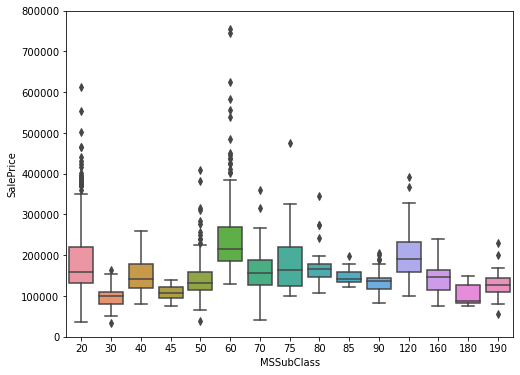

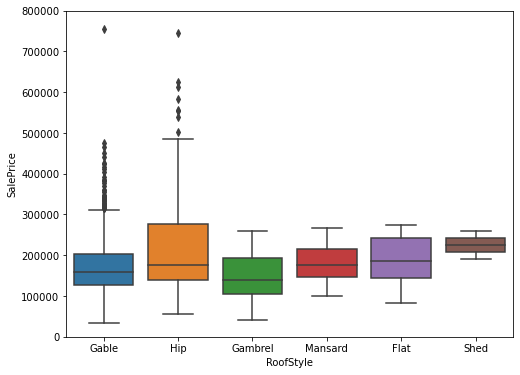

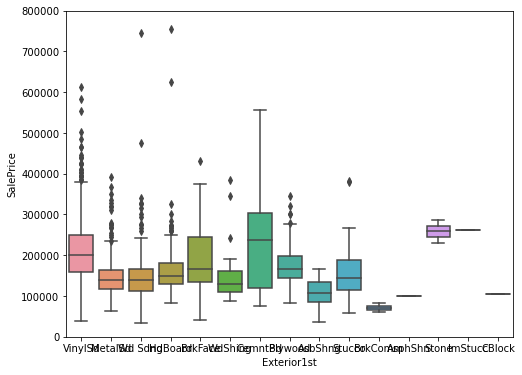

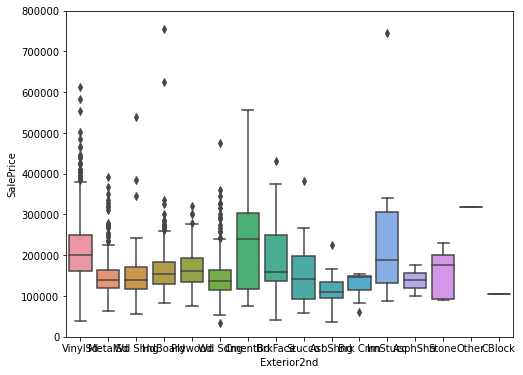

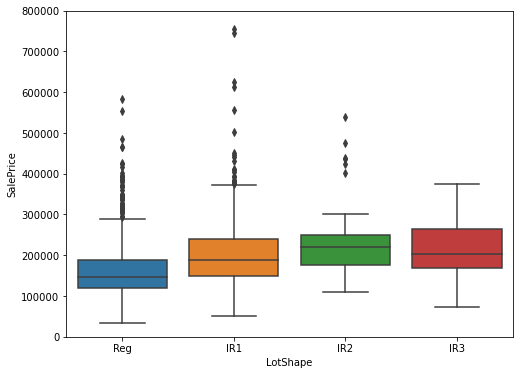

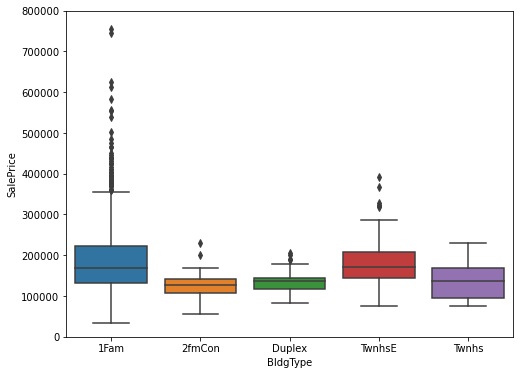

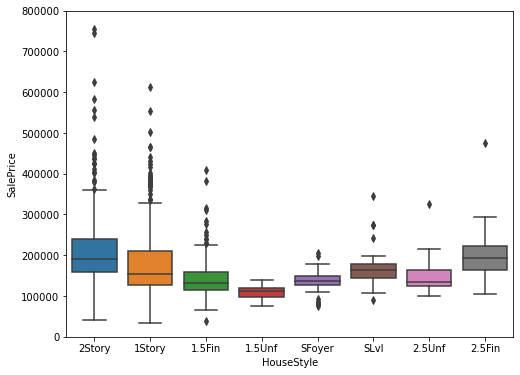

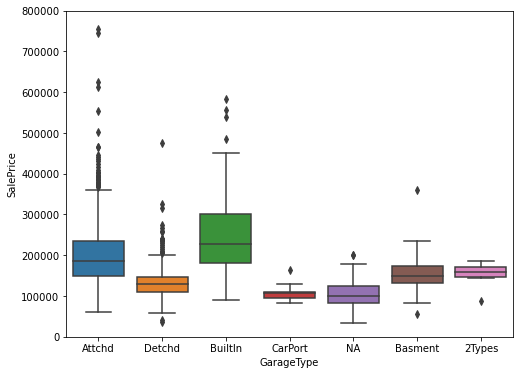

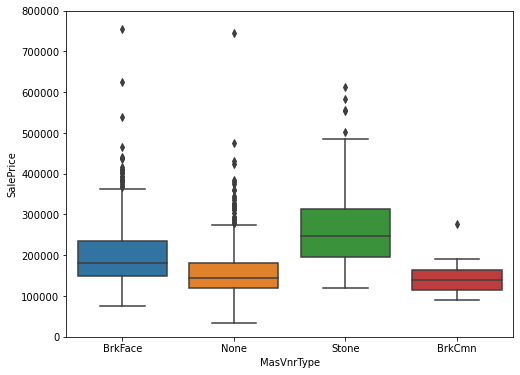

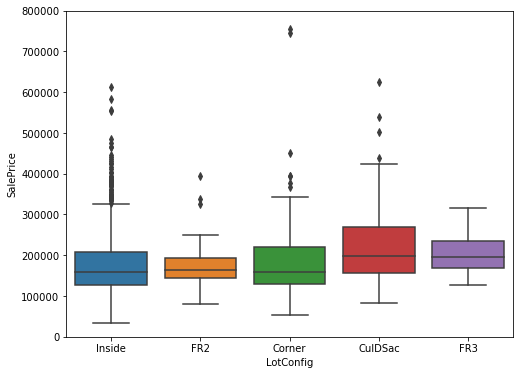

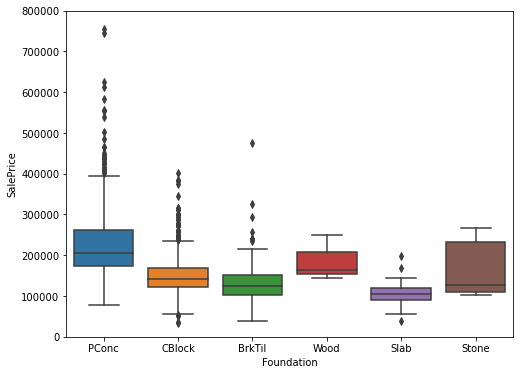

In [10]:
uncomparable_value_list = [
    "MSSubClass",
    "RoofStyle",
    "Exterior1st",
    "Exterior2nd",
    "LotShape",
    "BldgType",
    "HouseStyle",
    "GarageType",
    "MasVnrType",
    "LotConfig",
    "Foundation"
]

for var in uncomparable_value_list:
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)

그래프의 결과를 토대로 어떤 카테고리가 가장 대중들에게 선호되는지에 대한 설명과 선호도의 순서를 적었다.
<br>
<br>
RoofStyle : 특별하게 선호되는 지붕의 모양은 없었다.

```
선호 없음
```

Exterior1st : VinylSd,CemntBd 의 경우 5만 이상의 집값 차이로 보았을때, 특출난 선호를 보였다고 할 수 있었다.

```
선호 순서
    CemntBd
    VinylSd
    나머지변수
```

Exterior2nd: 상동

```
선호 순서
    CemntBd
    VinylSd
    나머지변수
```

LotShape: 특별하게 선호되는 지붕의 모양은 없었다.

```
선호 없음
```

BldgType: 1Fam 과 2FmCon을 비교해보았을때, 2FmCon보다 1Fam에 대한 선호도가 높았고, TwnhsI보다 TwnhsE에 대한 선호도가 높았으며, (1Fam, 2FmCon), (Duplx), (TwnhsE, TwnhsI) 세 그룹으로 나누고 세 그룹에 대한 선호도는 비슷하다고 간주하였다.

```
선호 순서
    (1Fam, 2FmCon)
    = (Duplx)
    = (TwnhsE, TwnhsI)
```

HouseStyle: 2.5Fin, 2Story, 1Story, 1.5Fin, 2.5Unf, 1.5Unf순의 선호도를 보였고,
SLv1, SFoyer순의 선호도를 보였다.
(2.5Fin, 2Story, 1Story, 1.5Fin, 2.5Unf, 1.5Unf) 와 (SLv1, SFoyer)는 한 그룹으로 보고 두 그룹의 대한 선호도는 비슷하다고 간주하였다.

```
선호 순서
    (2.5Fin, 2Story, 1Story, 1.5Fin, 2.5Unf, 1.5Unf)
    = (SLv1, SFoyer)
```

MasVnrType: stone, BrkFace, BrkCmn순의 선호도를 보였고
None 데이터는 Masonry veneer type에 포함되는 변수가 아니어서 고려하지 않았다.
CBlock의 경우에는 데이터가 존재하지 않았다.

```
선호 순서
    stone
    BrkFace
    BrkCmn
```
	
LotConfig: 특별하게 선호되는 주차장의 형태는 없었다.

```
선호 없음
```

Foundation: PConc, Wood, CBlock, BrkTil, Stone, Slab순의 선호도를 보였다.

```
선호 순서
    PConc
    Wood
    CBlock
    BrkTil
    Stone
    Slab
```
       
GarageType: 변수들의 그룹을 (BuiltIn, Attchd, Detchd), (Basement, CarPort)

,(NA), (2Types) 네 그룹으로 나누었고, 첫번째 그룹에서는 (BuiltIn, Attchd, Detchd)

순서의 선호도를 보였고, 두번째 그룹에서는 (Basement, CarPort) 순서의 선호도를 보였다.

그리고 (NA) 그룹의 경우에는 다른 그룹과 비교해 가장 낮은 선호를 보였으며, (2Types)

그룹의 변수는 나타내는 의미가 명확하지 않아서 분석 가능한 데이터로 간주하지 않았다.
	
```
선호 순서
    (BuiltIn, Attchd, Detchd)
    = (Basement, CarPort)
    > (NA)
```     

category data 에서 카테고리가 직접적으로 집값에 영향을 미치지 않는것으로 보이는 데이터에 대해서 확인하기 전에,

수치상으로 기록된 데이터에 대해서 scatter 그래프로 SalePrice와의 관계를 확인한 후 적당한 함수로 fitting해서 SalePrice에 대한 식을 만든다.<br>
그리고 각 numeric data column에 대한 설명은 다음과 같다.

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

MasVnrArea: Masonry veneer area in square feet

BsmtFinSF1: Type 1 finished square feet

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

GarageYrBlt: Year garage was built

GarageArea: Size of garage in square feet

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

MiscVal: $Value of miscellaneous feature

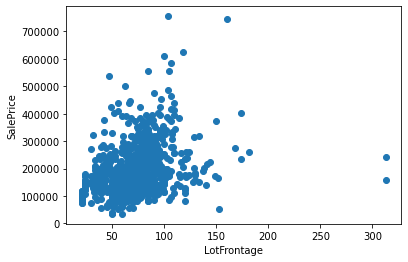

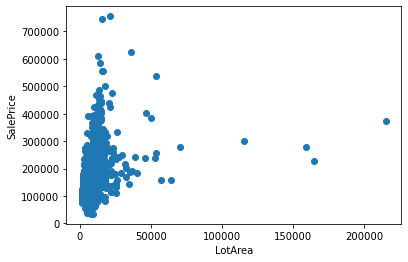

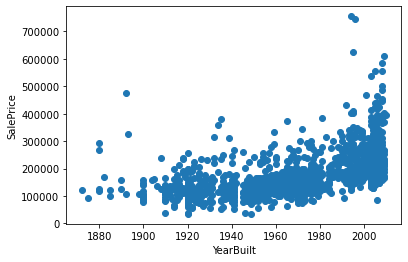

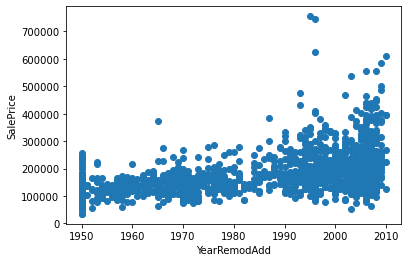

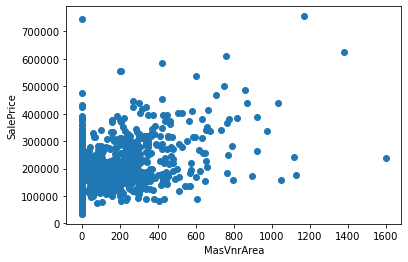

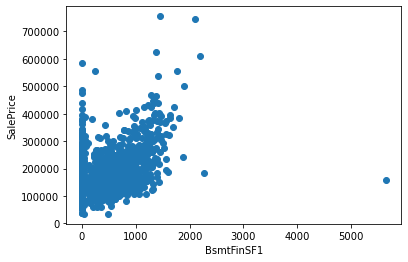

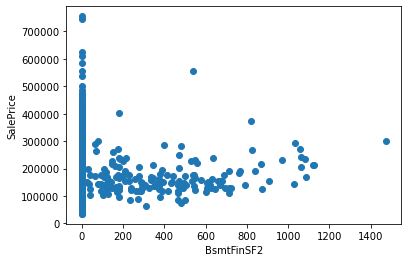

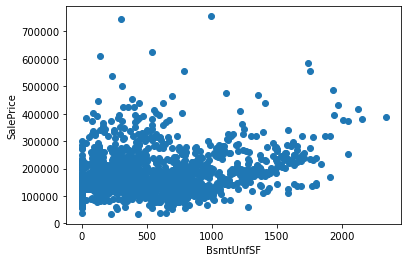

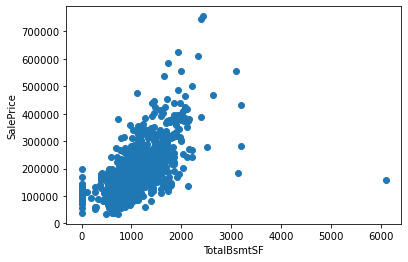

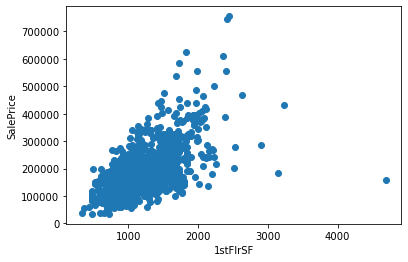

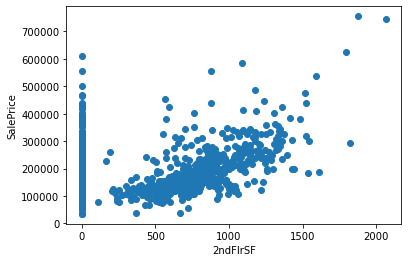

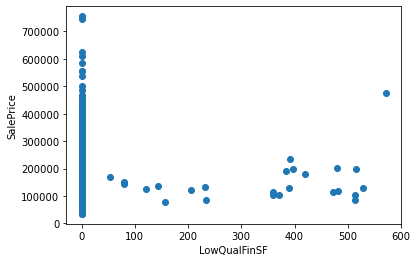

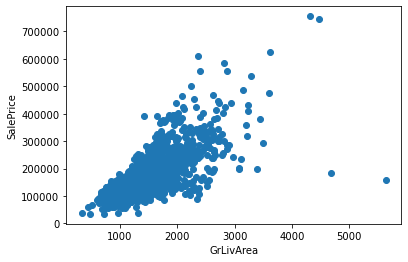

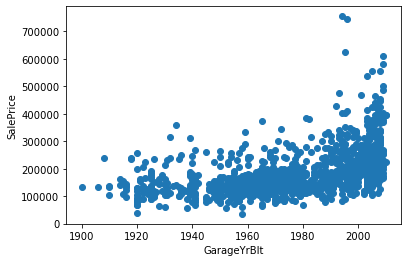

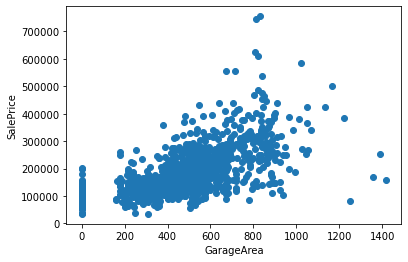

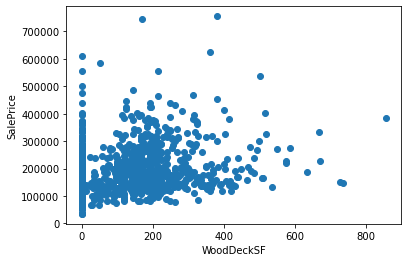

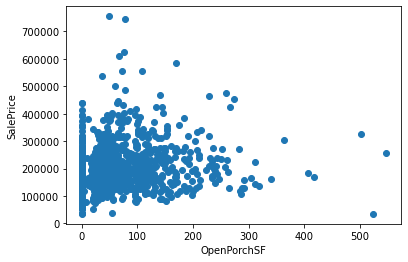

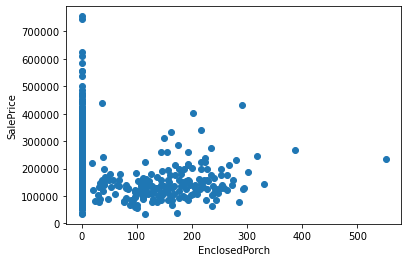

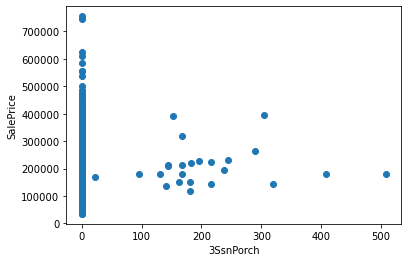

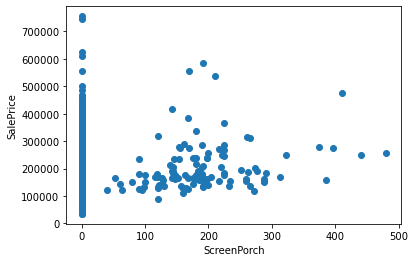

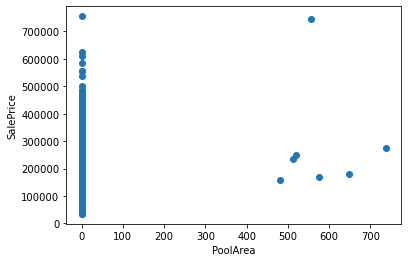

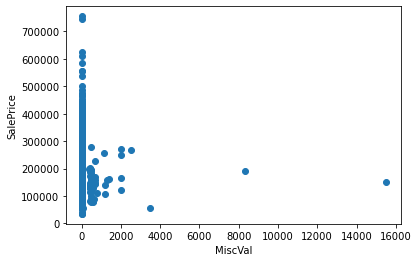

In [11]:
for numeric_data_column in df_train[numeric_data_list]:
    plt.scatter(df_train[numeric_data_column],df_train["SalePrice"])
    plt.xlabel(numeric_data_column)
    plt.ylabel("SalePrice")
    plt.show()

위 그래프에서 0으로 나타내어진 값은 해당하는 요소가 집에 존재하지 않는다는 의미임을 알 수 있는데,(예를 들면 GarageArea가 0인 점의 경우 해당 집에는 차고가 존재하지 않음)

해당 요소에 대한 존재 여부에 의한 집값 변동은 이미 category data column들을 보면서 분석했으므로 위 수치데이터를 분석할때 0 값은 결측치로 보아도 된다. 따라서 0값을 가지는 모든 데이터들을 결측치로 처리하고 다시 총 결측값을 확인한다.

In [12]:
df_train[numeric_data_list] = df_train[numeric_data_list].replace(0,np.nan)
# missing data count of numeric data
df_train[numeric_data_list].isnull().sum()

LotFrontage       259
LotArea             0
YearBuilt           0
YearRemodAdd        0
MasVnrArea        869
BsmtFinSF1        467
BsmtFinSF2       1293
BsmtUnfSF         118
TotalBsmtSF        37
1stFlrSF            0
2ndFlrSF          829
LowQualFinSF     1434
GrLivArea           0
GarageYrBlt        81
GarageArea         81
WoodDeckSF        761
OpenPorchSF       656
EnclosedPorch    1252
3SsnPorch        1436
ScreenPorch      1344
PoolArea         1453
MiscVal          1408
dtype: int64

이때 80% 이상의 결측값을 가지는 데이터에 대해서는 분석을 하지 않는 것으로 하였다.<br>
남은 데이터와 그 결측값의 수는 다음과 같다.

        data_column      num_of_na
----------------------------------------------------
        LotFrontage       259
        LotArea             0
        YearBuilt           0
        YearRemodAdd        0
        MasVnrArea        869
        BsmtFinSF1        467
        BsmtUnfSF         118
        TotalBsmtSF        37
        1stFlrSF            0
        2ndFlrSF          829
        GrLivArea           0
        GarageYrBlt        81
        GarageArea         81
        WoodDeckSF        761
        OpenPorchSF       656

그리고 이 데이터들에 대해서 다시 scatter 그래프를 그린다.

In [13]:
selected_numeric_data_list = [
    "LotFrontage",
    "LotArea",
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "GrLivArea",
    "GarageYrBlt",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF"
]

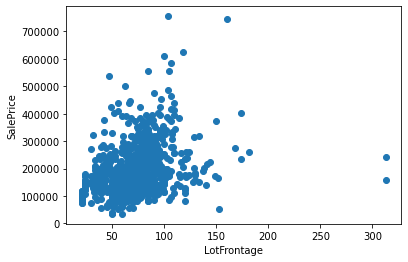

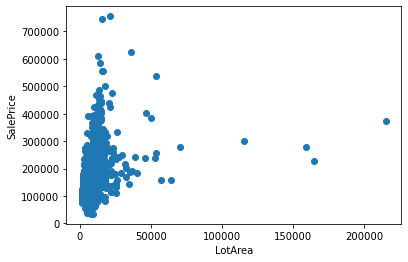

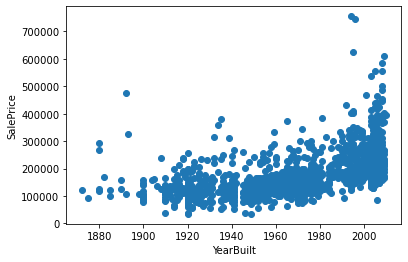

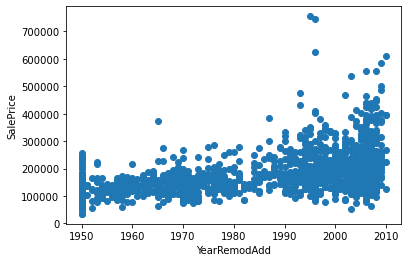

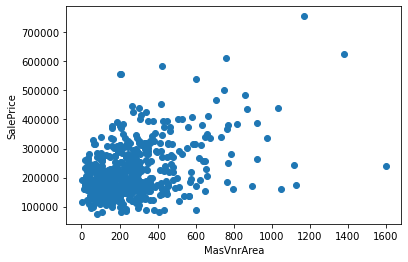

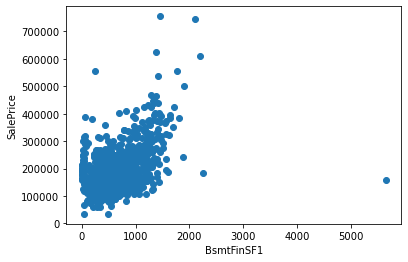

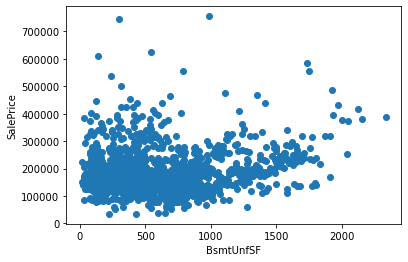

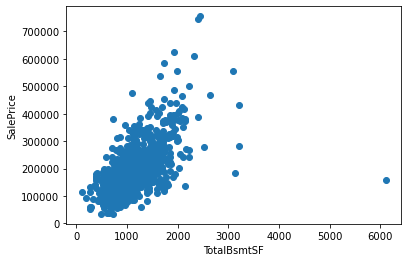

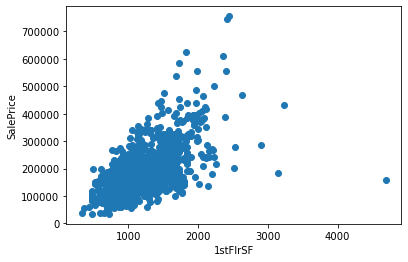

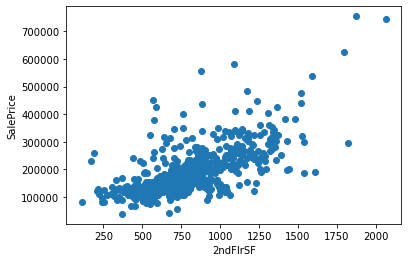

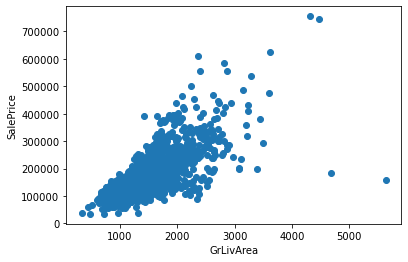

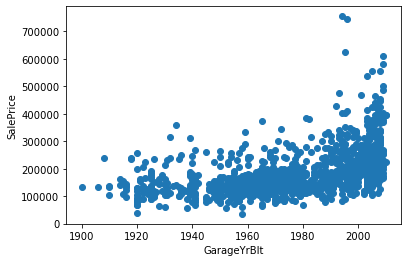

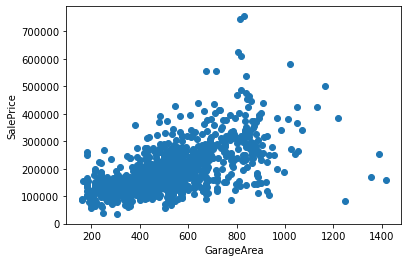

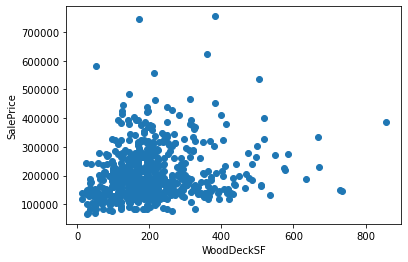

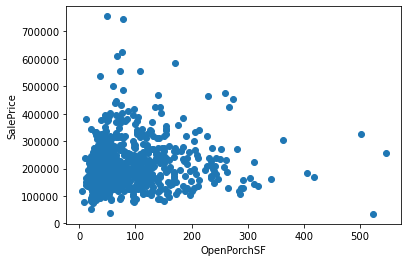

In [15]:
for numeric_data_column in df_train[selected_numeric_data_list]:
    plt.scatter(df_train[numeric_data_column],df_train["SalePrice"])
    plt.xlabel(numeric_data_column)
    plt.ylabel("SalePrice")
    plt.savefig(numeric_data_column)
    plt.show()

각 그래프별로 특정 범위 이상의 값들은 데이터가 충분히 존재하지 않아 해당 변수와 SalePrice와의 관계를 보는데 적합하지 않기 때문에 해당 범위에 있는 데이터들은 noise로 간주하고 NA값으로 대체하여 다시 분석하였다.

LotFrontage: Linear feet of street connected to property

noise > 150

LotArea: Lot size in square feet

noise > 50000

YearBuilt: Original construction date

noise -> none

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

noise -> none

MasVnrArea: Masonry veneer area in square feet

noise > 1200

BsmtFinSF1: Type 1 finished square feet

noise > 2000

BsmtUnfSF: Unfinished square feet of basement area

noise -> none

TotalBsmtSF: Total square feet of basement area

noise > 3000

1stFlrSF: First Floor square feet

noise > 3000

2ndFlrSF: Second floor square feet

noise > 1750

GrLivArea: Above grade (ground) living area square feet

noise > 4000

GarageYrBlt: Year garage was built

noise -> none

GarageArea: Size of garage in square feet

noise > 1100

WoodDeckSF: Wood deck area in square feet

noise > 600

OpenPorchSF: Open porch area in square feet

noise > 400

In [18]:
df_train.loc[df_train["LotFrontage"] > 150] = np.nan
df_train.loc[df_train["LotArea"] > 50000] = np.nan
df_train.loc[df_train["MasVnrArea"] > 1200] = np.nan
df_train.loc[df_train["BsmtFinSF1"] > 2000] = np.nan
df_train.loc[df_train["TotalBsmtSF"] > 3000] = np.nan
df_train.loc[df_train["1stFlrSF"] > 3000] = np.nan
df_train.loc[df_train["2ndFlrSF"] > 1750] = np.nan
df_train.loc[df_train["GrLivArea"] > 4000] = np.nan
df_train.loc[df_train["GarageArea"] > 1100] = np.nan
df_train.loc[df_train["WoodDeckSF"] > 600] = np.nan
df_train.loc[df_train["OpenPorchSF"] > 400] = np.nan

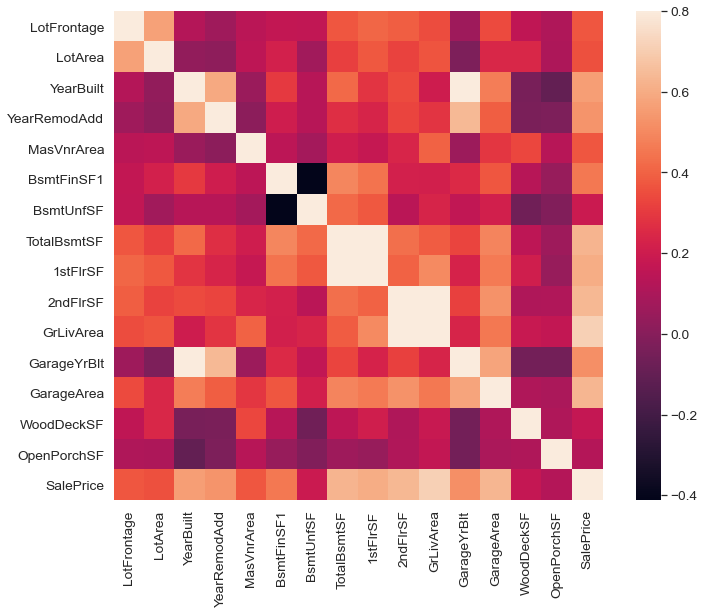

In [89]:
#correlation matrix
corrmat = df_train[selected_numeric_data_list + ["SalePrice"]].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

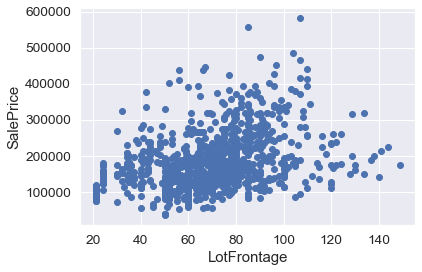

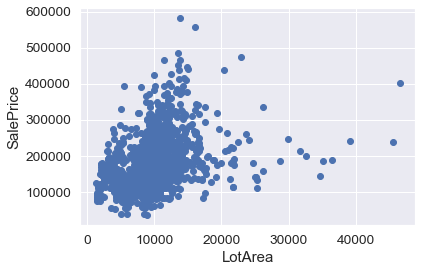

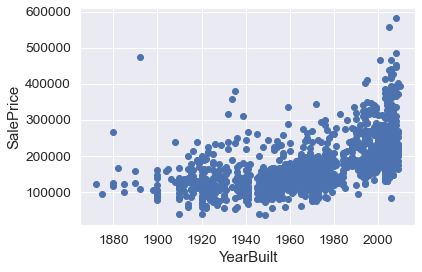

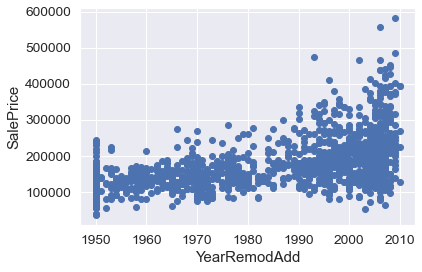

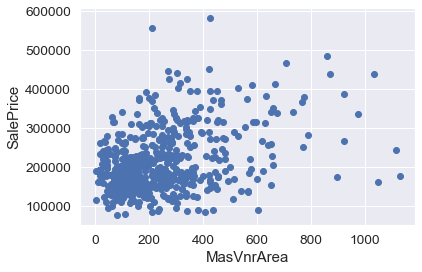

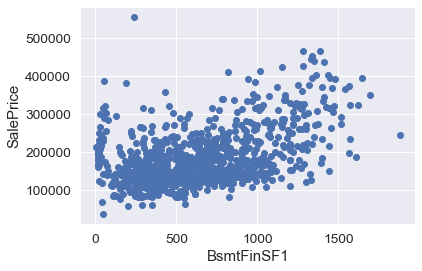

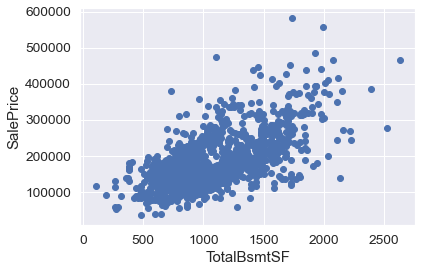

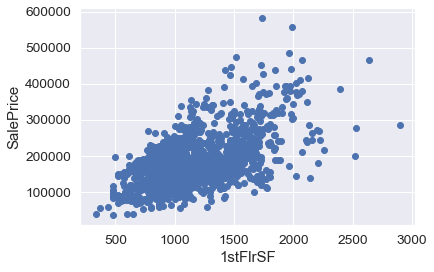

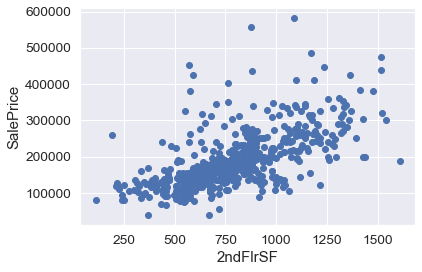

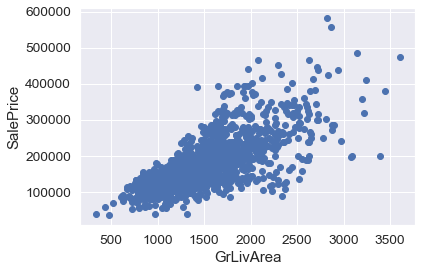

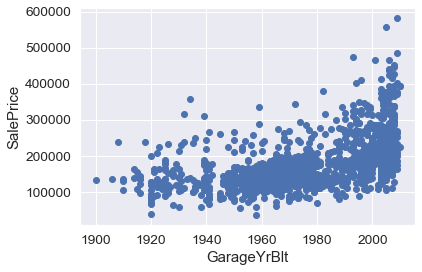

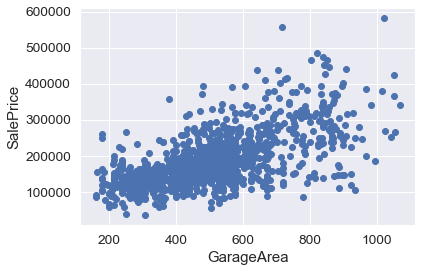

In [90]:
selected_numeric_data_list2 = [
    "LotFrontage",
    "LotArea",
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF1",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "GrLivArea",
    "GarageYrBlt",
    "GarageArea",
]

for numeric_data_column in df_train[selected_numeric_data_list2]:
    plt.scatter(df_train[numeric_data_column],df_train["SalePrice"])
    plt.xlabel(numeric_data_column)
    plt.ylabel("SalePrice")
#     plt.savefig(numeric_data_column)
    plt.show()

a = 1351.625504022635 b = 83816.82004446561


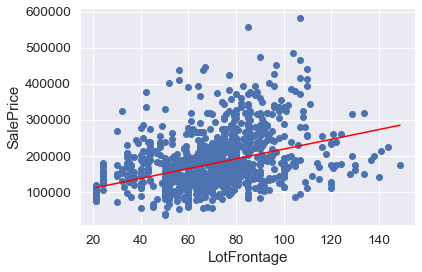

a = 6.9956368840611125 b = 110596.65925094427


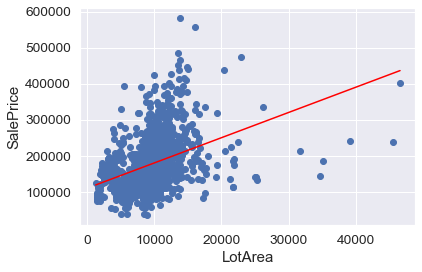

a = 156403.75798163007 b = 4.653841182040466


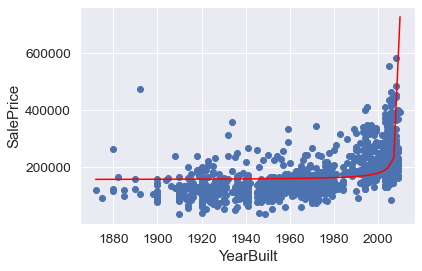

a = 156022.86975933262 b = 3.244541888042361


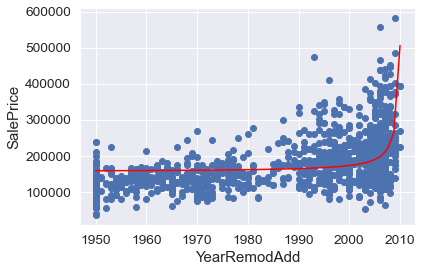

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

In [92]:
def other_guess_function(x, a, b):
    return a*x + b
def year_guess_function(year, a, b):
    current_year = 2011
    return a*b**(1/(current_year-year))

for numeric_data_column in df_train[selected_numeric_data_list]:
    new_df_train = df_train.loc[df_train["LotFrontage"].isnull() == False]
    if(re.compile("Year?|Yr?").match(numeric_data_column)):
        res1, res2 = curve_fit(year_guess_function, new_df_train[numeric_data_column], new_df_train["SalePrice"])
        print("a =", res1[0] , "b =", res1[1])
        x_list = np.linspace(new_df_train[numeric_data_column].min(),new_df_train[numeric_data_column].max())
        fit_list = [year_guess_function(x, res1[0], res1[1]) for x in x_list]
    else:
        res1, res2 = curve_fit(other_guess_function, new_df_train[numeric_data_column], new_df_train["SalePrice"])
        print("a =", res1[0] , "b =", res1[1])
        x_list = np.linspace(new_df_train[numeric_data_column].min(),new_df_train[numeric_data_column].max())
        fit_list = [other_guess_function(x, res1[0], res1[1]) for x in x_list]
    
    plt.scatter(new_df_train[numeric_data_column],new_df_train["SalePrice"])
    plt.plot(x_list, fit_list, color="Red")
    plt.xlabel(numeric_data_column)
    plt.ylabel("SalePrice")
#     plt.savefig(numeric_data_column)
    plt.show()

그리고 그래프의 결과를 각각 분석해 보았다.

LotFrontage
<img src="LotFrontage.png"/>

LotArea
<img src="LotArea.png"/>

YearBuilt
<img src="YearBuilt.png"/>

YearRemodAdd
<img src="YearRemodAdd.png"/>

MasVnrArea
<img src="MasVnrArea.png"/>

BsmtFinSF1
<img src="BsmtFinSF1.png"/>

BsmtUnfSF
<img src="BsmtUnfSF.png"/>

TotalBsmtSF
<img src="TotalBsmtSF.png"/>

1stFlrSF
<img src="1stFlrSF.png"/>

2ndFlrSF
<img src="2ndFlrSF.png"/>

GrLivArea
<img src="GrLivArea.png"/>

GarageYrBlt
<img src="GarageYrBlt.png"/>

GarageArea
<img src="GarageArea.png"/>

WoodDeckSF
<img src="WoodDeckSF.png"/>

OpenPorchSF
<img src="OpenPorchSF.png"/>
